In [14]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import ExtraTreesRegressor
from utils import utils_gn, utils_sevsn, utils_noah, utils_models
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_sevsn)
importlib.reload(utils_noah)
importlib.reload(utils_models)
warnings.filterwarnings('ignore')

In [15]:
# read the data
df_raw = (utils_gn.read_data('severson_all.pkl')).drop('cycle_life', axis=1).join(utils_gn.read_data('noah_all.pkl'))
df = df_raw.copy()
df.head()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
b1c0,-0.002873,-2.541602,0.000010,-5.014861,-0.008460,-2.072648,-0.532058,-0.274041,1.651688,0.217928,...,-0.005282,0.003144,-79.299389,-75.009448,-68.133388,11.166000,2.586119,0.000388,-0.000031,1851.0
b1c1,-0.004100,-2.387257,0.000010,-5.013960,-0.011004,-1.958457,-0.429375,-0.367163,1.970884,0.294661,...,0.001686,0.000501,-75.511329,-73.411862,-60.405989,15.105340,10.906407,0.000396,-0.000019,2159.0
b1c2,-0.004487,-2.348070,0.000018,-4.737000,-0.017216,-1.764058,-1.080194,0.033502,3.348637,0.524868,...,-0.005399,0.004043,-76.601709,-73.345940,-65.414446,11.187263,4.675725,0.000312,-0.000013,2236.0
b1c3,-0.007456,-2.127507,0.000036,-4.442613,-0.018961,-1.722149,-0.439050,-0.357486,1.904584,0.279800,...,-0.002219,0.012165,-80.446334,-67.731448,-55.749502,24.696832,-0.732940,0.000353,-0.000013,1433.0
b1c4,-0.005750,-2.240332,0.000023,-4.647744,-0.013958,-1.855177,-0.362548,-0.440634,1.666169,0.221719,...,0.002736,0.001597,-75.575598,-65.232594,-55.730088,19.845510,-0.840498,0.000347,-0.000030,1708.0


In [16]:
df.index

Index(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9',
       'b1c11',
       ...
       'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41', 'b3c42', 'b3c43',
       'b3c44', 'b3c45'],
      dtype='object', length=124)

In [17]:
df.columns

Index(['mean_Q_100_10', 'log_mean_Q_100_10', 'var_Q_100_10',
       'log_var_Q_100_10', 'min_Q_100_10', 'log_min_Q_100_10', 'skew_Q_100_10',
       'log_skew_Q_100_10', 'kurt_Q_100_10', 'log_kurt_Q_100_10',
       ...
       'dVdQpeak_maxmag_di_y_100m0', 'dVdQpeak_maxmag_di_y_diff',
       'dVdQpeak_maxarea_di_y_0', 'dVdQpeak_maxarea_di_y_50',
       'dVdQpeak_maxarea_di_y_100', 'dVdQpeak_maxarea_di_y_100m0',
       'dVdQpeak_maxarea_di_y_diff', 'dSOHdCycCyc1', 'dSOHdCycCyc100',
       'cycle_life'],
      dtype='object', length=245)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, b1c0 to b3c45
Columns: 245 entries, mean_Q_100_10 to cycle_life
dtypes: float64(245)
memory usage: 242.4+ KB


In [19]:
df.describe()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,-0.018901,-1.795793,0.000223,-3.835354,-0.040760,-1.440500,-0.103301,-0.777828,1.857125,0.261912,...,-0.000860,0.006225,-86.421878,-61.174991,-46.747626,40.011316,-11.308809,0.000265,-0.000069,807.241935
std,0.011347,0.270904,0.000262,0.411134,0.020373,0.217995,0.330102,0.425974,0.454478,0.067593,...,0.046542,0.046324,11.467643,12.863652,6.312352,9.989366,20.046688,0.000136,0.000137,364.359118
min,-0.077684,-3.105396,0.000010,-5.014861,-0.138026,-2.251053,-1.080194,-2.337813,1.612805,0.207582,...,-0.040421,-0.052170,-112.994264,-88.677648,-69.014721,0.491715,-85.815278,-0.000126,-0.001108,170.000000
25%,-0.024233,-1.950487,0.000077,-4.114970,-0.052091,-1.573442,-0.285918,-0.976312,1.710361,0.233088,...,-0.008152,-0.002622,-92.562247,-71.707141,-48.543997,36.915481,-26.371329,0.000190,-0.000065,525.750000
50%,-0.017671,-1.752752,0.000168,-3.775169,-0.038753,-1.411715,-0.141639,-0.713148,1.761561,0.245898,...,-0.005461,0.001079,-86.660594,-59.687399,-44.930027,41.479825,-6.326848,0.000246,-0.000038,743.000000
75%,-0.011208,-1.615590,0.000298,-3.526121,-0.026703,-1.283235,-0.001193,-0.472983,1.866319,0.270984,...,-0.002174,0.005336,-82.555981,-50.581414,-42.971080,46.361411,4.678101,0.000336,-0.000025,945.500000
max,0.000785,-1.109668,0.001875,-2.726901,-0.005610,-0.860038,1.986572,0.298104,5.920243,0.772340,...,0.491715,0.491715,0.491715,-21.537204,-30.971796,61.613879,23.552556,0.000990,0.000211,2236.000000


In [20]:
# prune cells with more than 1250 cycle life
df = df[df['cycle_life'] <= 1250]
df.index

Index(['b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16',
       'b1c17', 'b1c18',
       ...
       'b3c29', 'b3c30', 'b3c31', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41',
       'b3c43', 'b3c44'],
      dtype='object', length=113)

In [21]:
# define parameters for model pipeline
estimator = ExtraTreesRegressor()
param_grid = {"n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [2, 3, 4, 5],
            "min_samples_split": [2, 3, 4, 5]}
algo = utils_models.fit_tree_based_regression
fname = 'ext'

0 features removed from a total of 244
0 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.21 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 42.87031546236756,
 'MAPE': 0.06341640933243446,
 'MSE': 2809.0314318526043,
 'R2 score': 0.9384463259233938,
 'RMSE': 53.000296526081854}
Test:
{'MAE': 61.700524720477695,
 'MAPE': 0.090471553584371,
 'MSE': 5770.228802612512,
 'R2 score': 0.8945577584183977,
 'RMSE': 75.96202210718532}


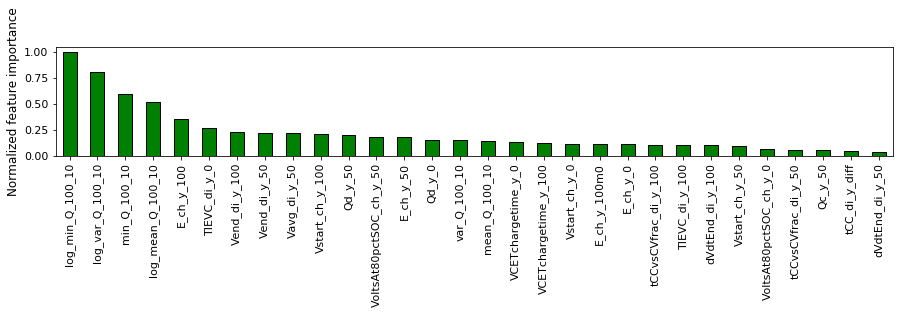

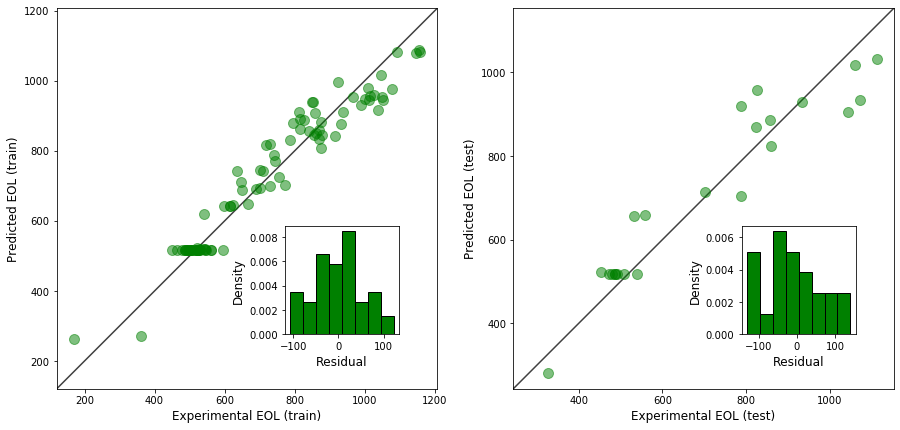

25 features removed from a total of 244
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.25 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 16.171763454121397,
 'MAPE': 0.02885408237213692,
 'MSE': 514.4147145821795,
 'R2 score': 0.9887277460399513,
 'RMSE': 22.680712391417064}
Test:
{'MAE': 53.768367388242446,
 'MAPE': 0.07904114681501395,
 'MSE': 4427.5787580275155,
 'R2 score': 0.9190926659937407,
 'RMSE': 66.54005378738069}


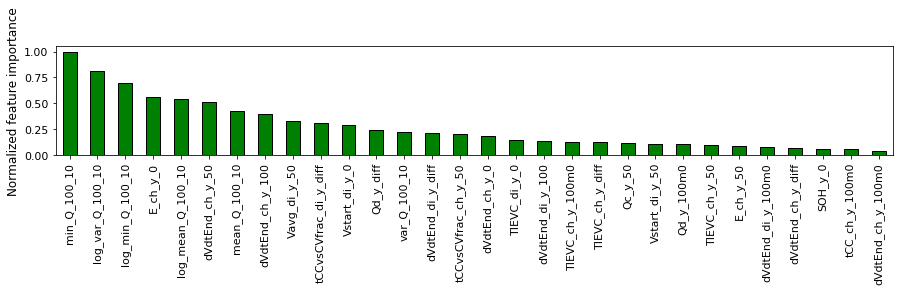

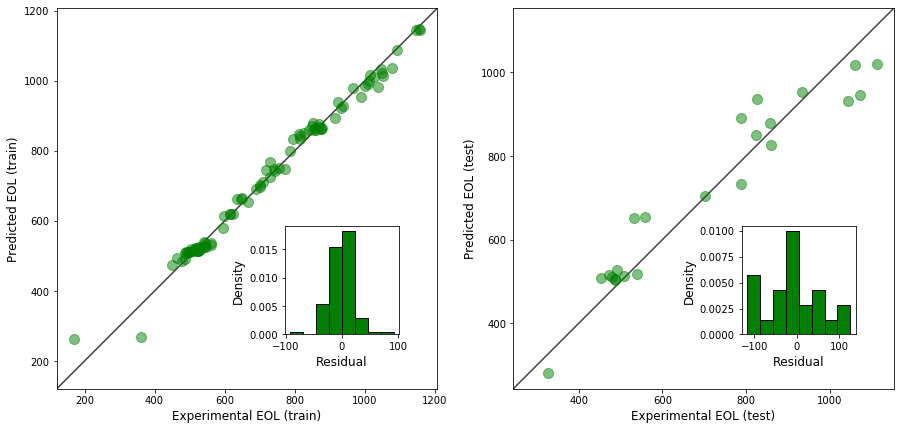

49 features removed from a total of 244
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.5 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 18.53839215417501,
 'MAPE': 0.03153812361097584,
 'MSE': 656.4862597552305,
 'R2 score': 0.9856145642193498,
 'RMSE': 25.621987818185197}
Test:
{'MAE': 53.41761591007349,
 'MAPE': 0.07819613569952341,
 'MSE': 4443.069326289866,
 'R2 score': 0.9188095991870631,
 'RMSE': 66.65635248263939}


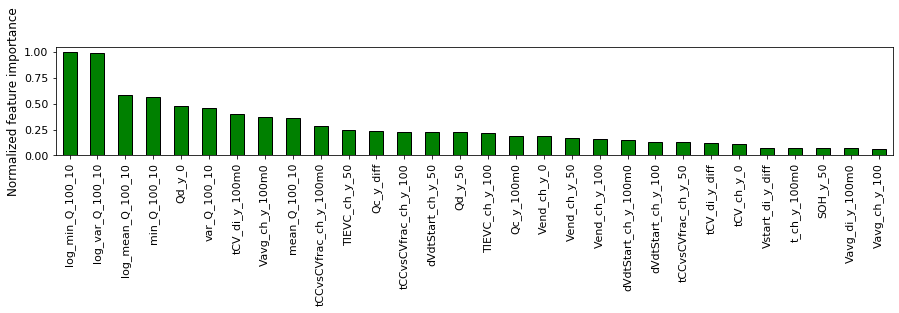

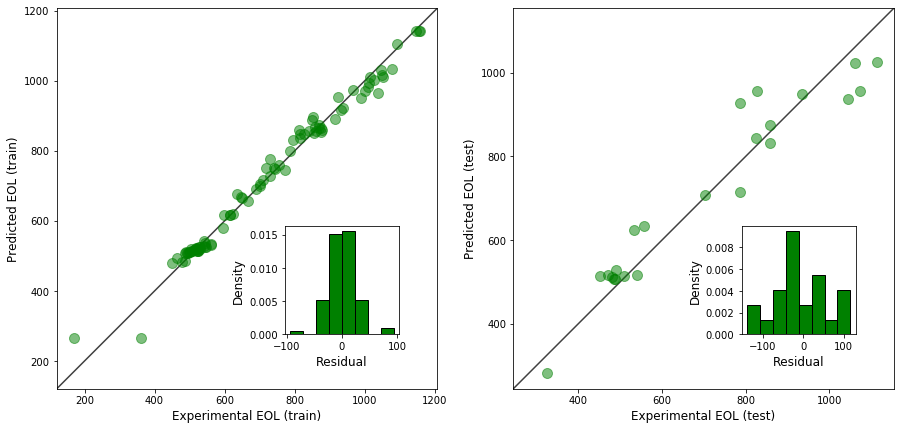

74 features removed from a total of 244
74 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.24 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 15.594326842738438,
 'MAPE': 0.021868853900927965,
 'MSE': 411.78260917194063,
 'R2 score': 0.9909767002860955,
 'RMSE': 20.292427384912347}
Test:
{'MAE': 51.32855888495833,
 'MAPE': 0.07382558356258356,
 'MSE': 3945.218561662065,
 'R2 score': 0.9279070721627799,
 'RMSE': 62.81097485043569}


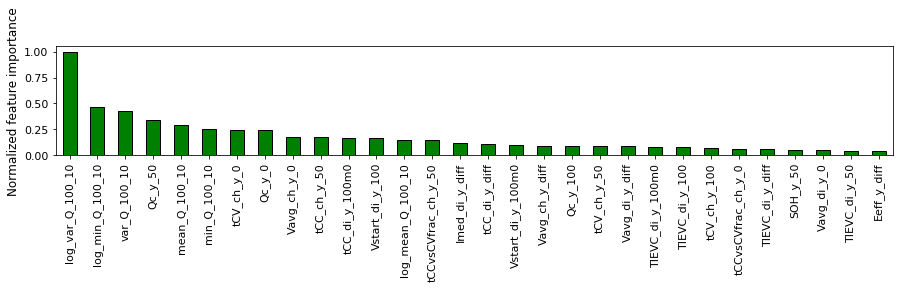

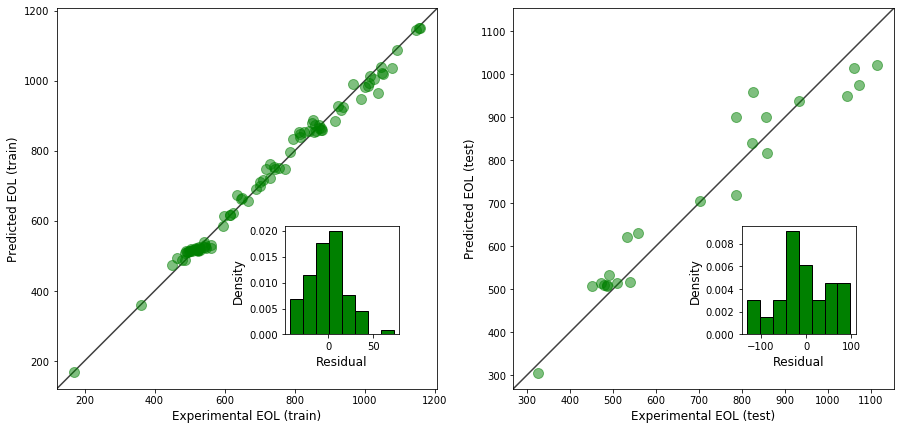

98 features removed from a total of 244
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.21 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 30.414709112513872,
 'MAPE': 0.047113804882555926,
 'MSE': 1516.0263230331814,
 'R2 score': 0.9667796561044545,
 'RMSE': 38.936182697244234}
Test:
{'MAE': 53.455148617072226,
 'MAPE': 0.0792784504206487,
 'MSE': 4314.584029815555,
 'R2 score': 0.9211574744852478,
 'RMSE': 65.68549329810621}


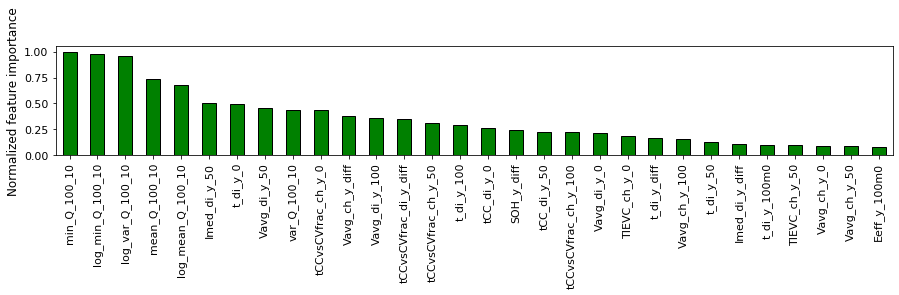

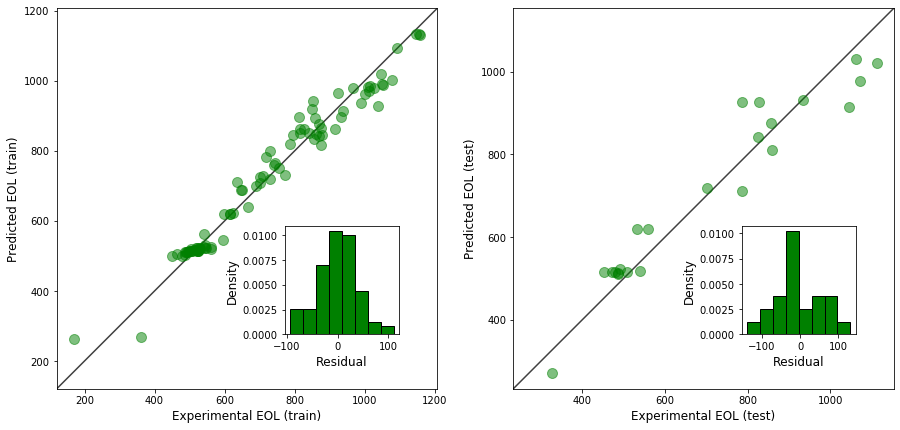

122 features removed from a total of 244
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.21 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 17.63405011154418,
 'MAPE': 0.030926178828079527,
 'MSE': 601.4594796272229,
 'R2 score': 0.9868203536779784,
 'RMSE': 24.524670836266548}
Test:
{'MAE': 47.26998758928357,
 'MAPE': 0.07007549992808759,
 'MSE': 3337.7142934259396,
 'R2 score': 0.9390082977821532,
 'RMSE': 57.77295468838287}


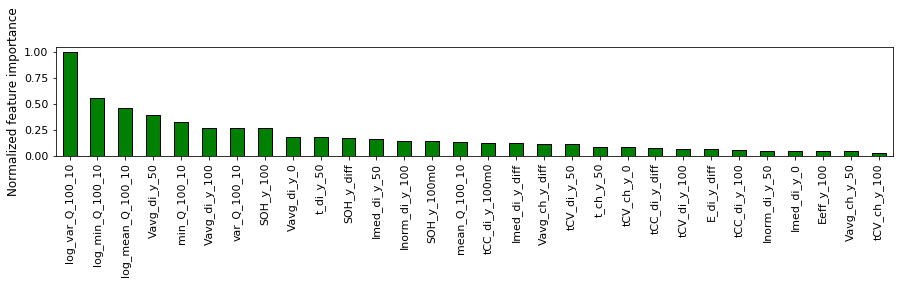

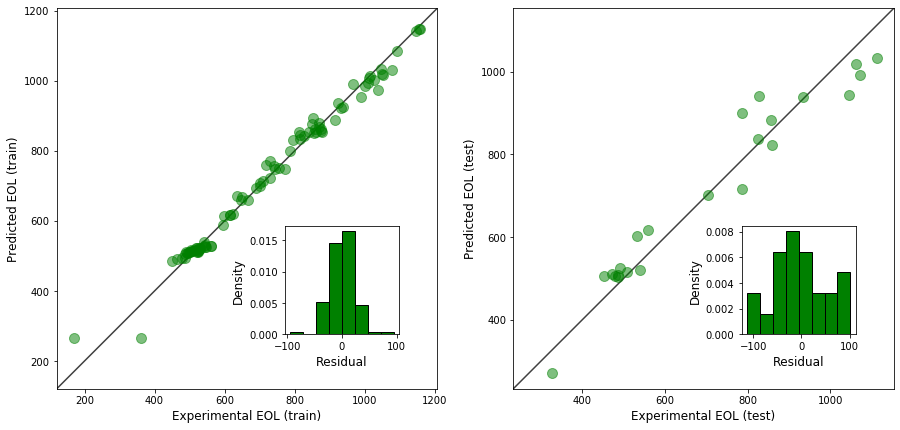

147 features removed from a total of 244
147 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.51 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 19.02413274663198,
 'MAPE': 0.032366531904490875,
 'MSE': 707.7715923328273,
 'R2 score': 0.9844907602595238,
 'RMSE': 26.60397700218573}
Test:
{'MAE': 47.71275855461909,
 'MAPE': 0.07097920407200072,
 'MSE': 3551.090964089224,
 'R2 score': 0.9351091604644494,
 'RMSE': 59.59103090305809}


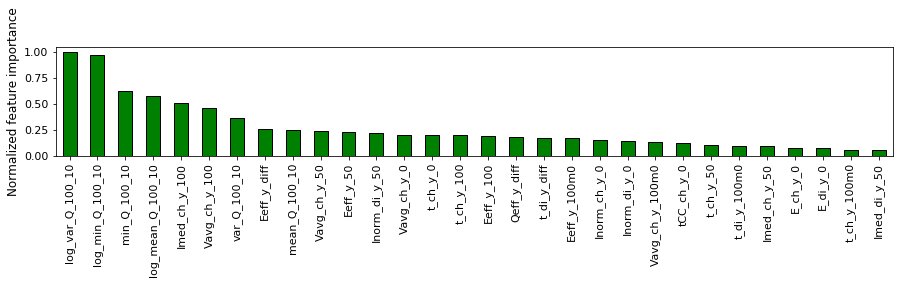

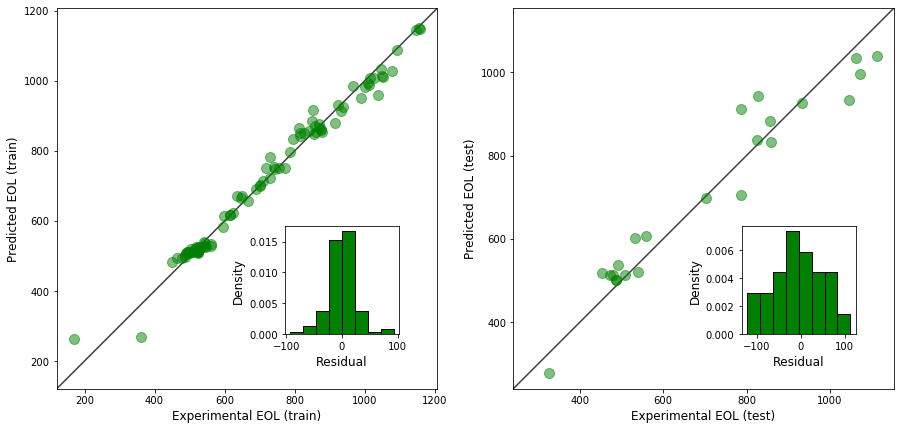

171 features removed from a total of 244
171 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.44 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 31.855028213066124,
 'MAPE': 0.048557013933398695,
 'MSE': 1692.0592155402435,
 'R2 score': 0.9629222869168852,
 'RMSE': 41.13464738563154}
Test:
{'MAE': 51.735715868256314,
 'MAPE': 0.07578736967889095,
 'MSE': 4203.894568905867,
 'R2 score': 0.9231801576884672,
 'RMSE': 64.83744727320676}


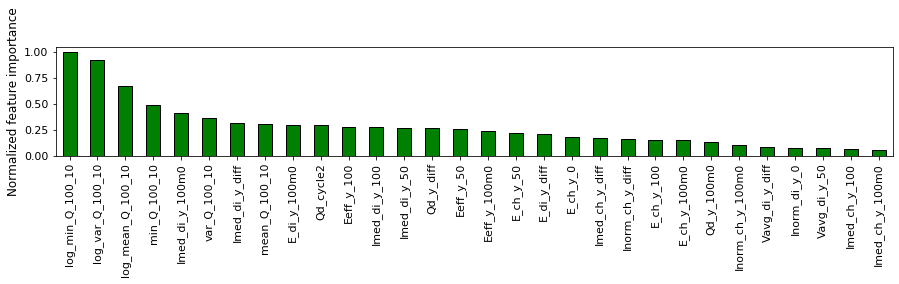

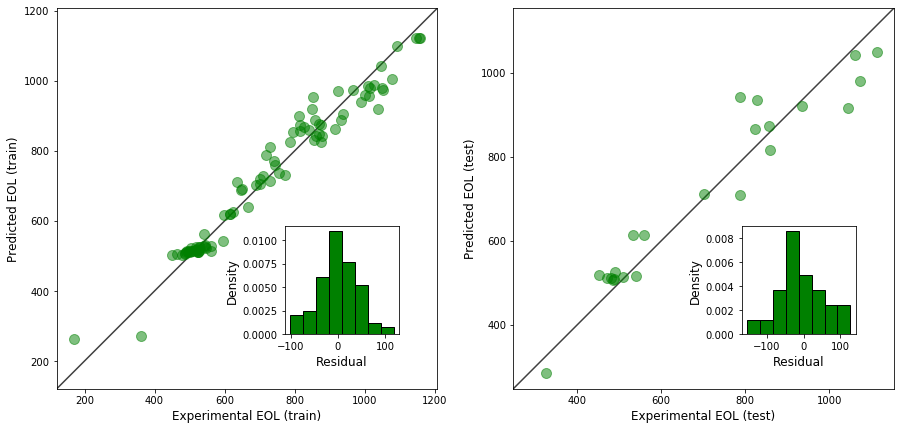

196 features removed from a total of 244
196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.18 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 33.69342485147918,
 'MAPE': 0.050846418580842885,
 'MSE': 1894.9750132589809,
 'R2 score': 0.9584758386727884,
 'RMSE': 43.53131072296102}
Test:
{'MAE': 52.16086146490878,
 'MAPE': 0.07546567304102923,
 'MSE': 4640.042913225092,
 'R2 score': 0.9152102035219526,
 'RMSE': 68.11786045689553}


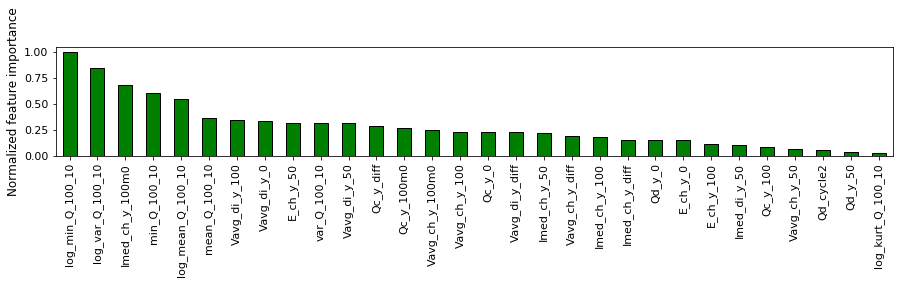

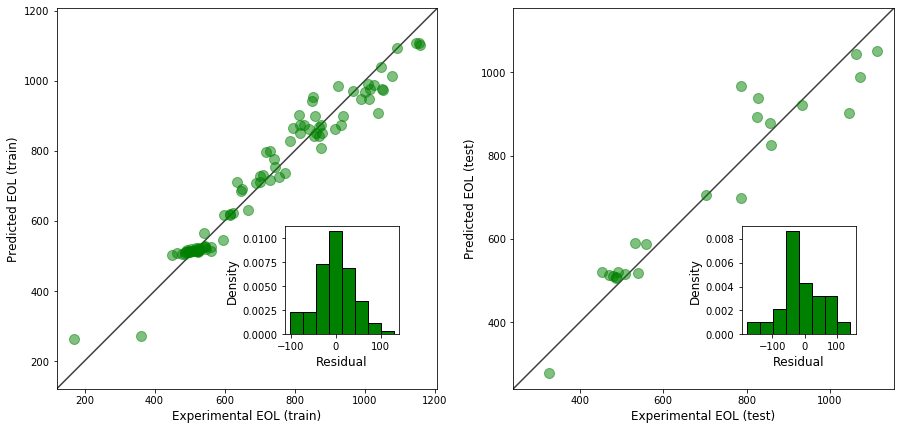

In [22]:
# call the model pipeline function
best_k, best_param, metrics = utils_models.model_pipeline(df=df,
                                                          algo=algo,
                                                          estimator=estimator,
                                                          param_grid=param_grid,
                                                          fname=fname,
                                                          model_type='ext')

In [23]:
best_k

0.5

In [24]:
best_param

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}

In [25]:
metrics

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score
Features used,,,,,,,,,,
1.0,42.870315,0.063416,2809.031432,53.000297,0.938446,61.700525,0.090472,5770.228803,75.962022,0.894558
0.9,16.171763,0.028854,514.414715,22.680712,0.988728,53.768367,0.079041,4427.578758,66.540054,0.919093
0.8,18.538392,0.031538,656.486260,25.621988,0.985615,53.417616,0.078196,4443.069326,66.656352,0.918810
0.7,15.594327,0.021869,411.782609,20.292427,0.990977,51.328559,0.073826,3945.218562,62.810975,0.927907
0.6,30.414709,0.047114,1516.026323,38.936183,0.966780,53.455149,0.079278,4314.584030,65.685493,0.921157
0.5,17.634050,0.030926,601.459480,24.524671,0.986820,47.269988,0.070075,3337.714293,57.772955,0.939008
0.4,19.024133,0.032367,707.771592,26.603977,0.984491,47.712759,0.070979,3551.090964,59.591031,0.935109
0.3,31.855028,0.048557,1692.059216,41.134647,0.962922,51.735716,0.075787,4203.894569,64.837447,0.923180
0.2,33.693425,0.050846,1894.975013,43.531311,0.958476,52.160861,0.075466,4640.042913,68.117860,0.915210


### Perform $k$-Fold Repeated Cross-validation on the model with feature selection and best MAPE

In [26]:
model = ExtraTreesRegressor(**best_param)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=True,
                                            scaling=False,
                                            k=best_k)



122 features removed from a total of 244


{'test_MAE': (56.27305570490269, 10.46734144592305),
 'test_MAPE': (0.08766228438871478, 0.028592537492388194),
 'test_MSE': (5886.562969803249, 2513.9081639314054),
 'test_R2 score': (0.8766375116971753, 0.046033278162118926)}